In [2]:
import numpy as np
import cv2
import os, os.path
import glob

#multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

DIR = 'input'
path = '/home/gc1569/Images/test/'
numPics = [f for f in os.listdir(path) if f.endswith('.jpg')]
print(numPics)
for pic in range(1, (len(numPics)+1)):
    print(numPics[pic-1])
    img = cv2.imread(path+numPics[pic-1])
    height = img.shape[0]
    width = img.shape[1]
    size = height * width

    if size > (500^2):
        r = 500.0 / img.shape[1]
        dim = (500, int(img.shape[0] * r))
        img2 = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img = img2

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    eyesn = 0

    for (x,y,w,h) in faces:
        imgCrop = img[y:y+h,x:x+w]
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            eyesn = eyesn +1
        if eyesn >= 2:
            cv2.imwrite("/home/gc1569/Images/test/"+str(pic)+".jpg", imgCrop)

    print("Image"+str(pic)+" has been processed and cropped")
    

#cap.release()
print("All images have been processed!!!")
cv2.destroyAllWindows()
cv2.destroyAllWindows()

['17651994244..jpg']
17651994244..jpg
Image1 has been processed and cropped
All images have been processed!!!


error: /opt/conda/conda-bld/opencv_1491943970124/work/opencv-3.1.0/modules/highgui/src/window.cpp:539: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvDestroyAllWindows


In [3]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data

y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.29s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.24s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.05s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


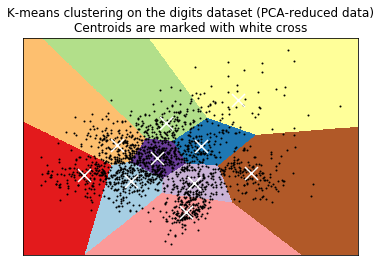

In [4]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

(200, 200)


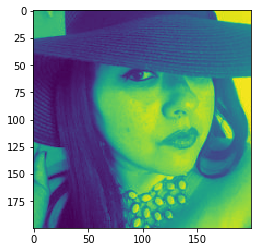

In [6]:
from skimage import io
from skimage import feature
import matplotlib.pyplot as plt
picture = io.imread('/home/gc1569/Images/test/17651994244..jpg', as_grey=True)
print(picture.shape)
plt.imshow(picture)
plt.show()

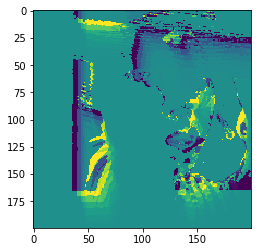

In [7]:
picture2 = feature.local_binary_pattern(picture, 50, 50)
plt.imshow(picture2)
plt.show()

In [8]:
picture2 = feature.hog(picture)
print(len(picture2))

42849


/home/gc1569/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


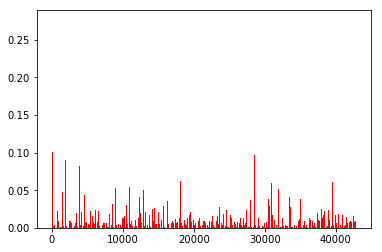

In [9]:
fig,ax = plt.subplots()
ax.bar(range(len(picture2)), picture2, color='r')
plt.show()